<a href="https://colab.research.google.com/github/vivekkchandra/CE888_Lab/blob/master/Insurancedf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##1.Import and Reading Dataset

In [0]:
insurancedf = pd.read_csv('https://raw.githubusercontent.com/vivekkchandra/CE888Assignment/master/Assignment2/Data/insurance80.csv', sep=',', quotechar='"')

### Information on insurancedf

In [4]:
insurancedf

,age,sex,bmi,children,region,charges,smoker
0,19,0,27.900,0,2,16884.92400,1
1,18,1,33.770,1,3,1725.55230,0
2,28,1,33.000,3,3,4449.46200,0
3,33,1,22.705,0,0,21984.47061,0
4,32,1,28.880,0,0,3866.85520,0
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0
1334,18,0,31.920,0,1,2205.98080,0
1335,18,0,36.850,0,3,1629.83350,0
1336,21,0,25.800,0,2,2007.94500,0


In [6]:
#1338 rows, 7 variable coloumns (features)
insurancedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   region    1338 non-null   int64  
 5   charges   1338 non-null   float64
 6   smoker    1338 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [7]:
#Checking for missing values
insurancedf.isnull().any().sum()>0

False

In [8]:
#the target variable 
insurancedf['smoker'].value_counts() 
insurancedf.describe()

0    1064
1     274
Name: smoker, dtype: int64

As you can see from above it shows the max values and this shows that standardisation needs to be applied to some of the features. 

### Preprocessing Data

Transforming the data to centre it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

In [0]:
x=insurancedf.drop('smoker', axis=1)
y=insurancedf.smoker

Split data into train and test 

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7, random_state=90)


Applying scale function to perform standardisation

In [0]:
from sklearn.preprocessing import StandardScaler

In [13]:
std_scaled=StandardScaler().fit(x_train)
x_train_norm=std_scaled.transform(x_train)
print(x_train_norm)
print(x_train_norm.mean(axis=0))
print(x_train_norm.std(axis=0))

[[ 1.53316822 -1.00643093  0.92581042 -0.88988239 -0.47515608  0.02657423]
 [-1.39520444 -1.00643093 -0.58898128 -0.06601501  1.27926637  0.3120186 ]
 [-0.60954349 -1.00643093 -0.62572375 -0.88988239  1.27926637 -0.7907774 ]
 ...
 [ 0.67608354 -1.00643093 -1.20024232  0.75785236 -1.35236731 -0.26128841]
 [-0.75239093 -1.00643093  0.13250716 -0.88988239 -0.47515608 -0.77540721]
 [ 0.03327002 -1.00643093 -0.09295798 -0.06601501  1.27926637 -0.56385446]]
[ 1.89781714e-18 -1.51825371e-17  1.03431034e-16  8.72995883e-17
 -9.86864911e-17 -4.93432455e-17]
[1. 1. 1. 1. 1. 1.]


In [0]:
x_test_norm=std_scaled.transform(x_test)

Converting Numpy array to dataframe

In [15]:
x_train.loc[x_train.index,x_train.columns] = x_train_norm
x_train
x_train.describe()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,age,sex,bmi,children,region,charges
588,1.533168,-1.006431,0.925810,-0.889882,-0.475156,0.026574
261,-1.395204,-1.006431,-0.588981,-0.066015,1.279266,0.312019
743,-0.609543,-1.006431,-0.625724,-0.889882,1.279266,-0.790777
1293,0.461812,0.993610,-0.771859,1.581720,-1.352367,-0.332027
1294,1.318897,0.993610,-0.867055,-0.889882,-0.475156,-0.114468
...,...,...,...,...,...,...
570,-0.609543,-1.006431,-0.211536,-0.889882,0.402055,-0.790492
452,-1.109510,0.993610,-1.163500,-0.889882,0.402055,-0.938747
679,0.676084,-1.006431,-1.200242,0.757852,-1.352367,-0.261288
671,-0.752391,-1.006431,0.132507,-0.889882,-0.475156,-0.775407


In [17]:
x_test.loc[x_test.index,x_test.columns] = x_test_norm
x_test
x_test.describe()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,age,sex,bmi,children,region,charges
1247,-0.466696,0.993610,-0.161433,2.405587,0.402055,-0.600351
809,-1.038086,0.993610,-0.755992,-0.066015,-0.475156,-0.827852
164,-0.181001,0.993610,-0.121350,-0.889882,-1.352367,-0.685665
405,0.890355,-1.006431,1.338328,0.757852,-0.475156,-0.158673
637,-0.323849,-1.006431,1.290730,0.757852,-0.475156,0.959904
...,...,...,...,...,...,...
154,0.033270,-1.006431,-0.819457,-0.066015,-0.475156,-0.516114
1228,1.176050,0.993610,0.678634,-0.889882,1.279266,-0.225092
1135,0.747507,-1.006431,-0.375207,1.581720,-1.352367,-0.184433
518,-0.323849,-1.006431,0.105785,-0.066015,0.402055,-0.668071


In [0]:
#Avoiding Overfitting 
import sklearn.feature_selection
select=sklearn.feature_selection.SelectKBest(k=4)
selected_features=select.fit(x_train,y_train)
indices_selected=selected_features.get_support(indices=True)
colnames_selected=[x.columns[i] for i in indices_selected]
x_train_selected=x_train[colnames_selected]
x_test_selected=x_test[colnames_selected]

In [21]:
#features that have been selected
colnames_selected

['sex', 'bmi', 'region', 'charges']

##2.To establish a baseline, perform cross-validation on your dataset using a decision tree and a random forest.

In [0]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score , StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [0]:
#x = df[df.columns[:49]] ##Predictors
x=insurancedf.drop('smoker', axis=1)
y=insurancedf.smoker ## Target variable

In [57]:

clf = DecisionTreeClassifier(random_state=0)
DAcc_scores=cross_val_score(clf,x,y,cv=10,scoring=make_scorer(accuracy_score)) #calculates accuracy 
DPre_scores=cross_val_score(clf,x,y,cv=10,scoring=make_scorer(precision_score)) #calculates precision
DRec_scores=cross_val_score(clf,x,y,cv=10,scoring=make_scorer(recall_score)) #calculates Recall
DF1_scores=cross_val_score(clf,x,y,cv=10,scoring=make_scorer(f1_score)) #calculates Recall
print("Accuracy:", DAcc_scores)
print("Precision:", DPre_scores)
print("Recall:", DRec_scores)
print("F1 Score:", DF1_scores)

Accuracy: [0.94776119 0.94029851 0.96268657 0.97761194 0.97761194 0.98507463
 0.99253731 0.96268657 0.94736842 0.96240602]
Precision: [0.92       0.88461538 0.84848485 1.         0.92857143 0.93103448
 1.         0.89285714 0.88461538 0.92307692]
Recall: [0.82142857 0.82142857 1.         0.89285714 0.96296296 1.
 0.96296296 0.92592593 0.85185185 0.88888889]
F1 Score: [0.86792453 0.85185185 0.91803279 0.94339623 0.94545455 0.96428571
 0.98113208 0.90909091 0.86792453 0.90566038]


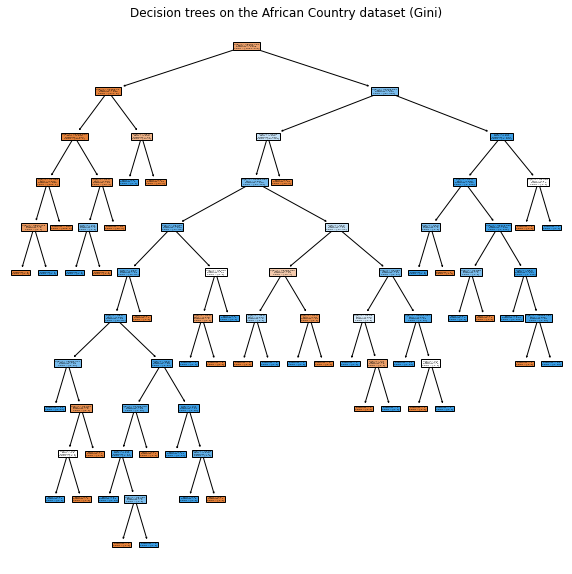

In [60]:
# Decision Tree graph
plt.figure(figsize=(10,10))
plottree=plot_tree(clf.fit(x, y),filled=True)
plt.title("Decision trees on the African Country dataset (Gini)")
plt.show()


In [61]:
print("Accuracy: %0.2f (+/- %0.2f)" % (DAcc_scores.mean(), DAcc_scores.std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (DPre_scores.mean(), DPre_scores.std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (DRec_scores.mean(), DRec_scores.std() * 2))
print("F1 Score: %0.2f (+/- %0.2f)" % (DF1_scores.mean(), DF1_scores.std() * 2))

Accuracy: 0.97 (+/- 0.03)
Precision: 0.92 (+/- 0.09)
Recall: 0.91 (+/- 0.13)
F1 Score: 0.92 (+/- 0.08)


In [62]:
RFC=RandomForestClassifier()

RAcc_scores=cross_val_score(RFC,x,y,cv=10,scoring=make_scorer(accuracy_score)) #calculates accuracy 
RPre_scores=cross_val_score(RFC,x,y,cv=10,scoring=make_scorer(precision_score)) #calculates precision
RRec_scores=cross_val_score(RFC,x,y,cv=10,scoring=make_scorer(recall_score)) #calculates Recall
RF1_scores=cross_val_score(RFC,x,y,cv=10,scoring=make_scorer(f1_score)) #calculates Recall
print("Accuracy:", RAcc_scores)
print("Precision:", RPre_scores)
print("Recall:", RRec_scores)
print("F1 Score:", RF1_scores)

Accuracy: [0.94776119 0.94776119 0.95522388 0.95522388 0.96268657 0.97014925
 0.98507463 0.93283582 0.96992481 0.98496241]
Precision: [0.83870968 0.84375    0.81818182 0.92       0.92857143 0.96153846
 1.         0.78125    0.89655172 0.96296296]
Recall: [0.92857143 0.96428571 0.96428571 0.82142857 0.92592593 0.92592593
 0.92592593 0.96296296 0.96296296 0.96296296]
F1 Score: [0.9        0.91525424 0.8852459  0.88888889 0.92857143 0.90566038
 0.98113208 0.83333333 0.92857143 0.94339623]


In [63]:
print("Accuracy: %0.2f (+/- %0.2f)" % (RAcc_scores.mean(), RAcc_scores.std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (RPre_scores.mean(), RPre_scores.std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (RRec_scores.mean(), RRec_scores.std() * 2))
print("F1 Score: %0.2f (+/- %0.2f)" % (RF1_scores.mean(), RF1_scores.std() * 2))

Accuracy: 0.96 (+/- 0.03)
Precision: 0.90 (+/- 0.14)
Recall: 0.93 (+/- 0.08)
F1 Score: 0.91 (+/- 0.07)


##3. Partition each of the datasets into 10 bins, keeping the imbalance ratio from the original dataset using stratified cross-validation 


###Performing Stratified CV

In [64]:
skf = StratifiedKFold(n_splits=10,shuffle=False,random_state=None)

#enumerate the splits and summerise the distributions
for train_index, test_index in skf.split(x, y):
  
  #selects rows
  xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
  ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
  
  
  #summarising the train and test composition
  train_0, train_1 = len(ytrain[ytrain==0]), len(ytrain[ytrain==1])
  test_0, test_1 = len(ytest[ytest==0]), len(ytest[ytest==1])
  print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))
  ##printing shape to see if the fold ratio is 9:1 which in this case it is roughly.
  print(xtrain.shape)

>Train: 0=958, 1=246, Test: 0=106, 1=28
(1204, 6)
>Train: 0=958, 1=246, Test: 0=106, 1=28
(1204, 6)
>Train: 0=958, 1=246, Test: 0=106, 1=28
(1204, 6)
>Train: 0=958, 1=246, Test: 0=106, 1=28
(1204, 6)
>Train: 0=957, 1=247, Test: 0=107, 1=27
(1204, 6)
>Train: 0=957, 1=247, Test: 0=107, 1=27
(1204, 6)
>Train: 0=957, 1=247, Test: 0=107, 1=27
(1204, 6)
>Train: 0=957, 1=247, Test: 0=107, 1=27
(1204, 6)
>Train: 0=958, 1=247, Test: 0=106, 1=27
(1205, 6)
>Train: 0=958, 1=247, Test: 0=106, 1=27
(1205, 6)


####Training Data

Percentage of Non_smokers is 20.497925311203318
Percentage of Smokers is 79.50207468879668


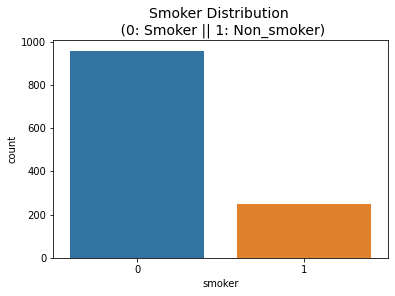

In [66]:
Non_smoker= len(ytrain[ytrain==1])
Smoker=len(ytrain[ytrain==0])

percentofNon_smokers= Non_smoker/(Non_smoker+Smoker)
percentofSmokers= Smoker/(Non_smoker+Smoker)

print("Percentage of Non_smokers is", percentofNon_smokers*100)
print("Percentage of Smokers is", percentofSmokers*100)

plt.title('Smoker Distribution \n (0: Smoker || 1: Non_smoker)', fontsize=14)
sns.countplot(ytrain,data=insurancedf)


####Test Data

Percentage of Non_smokers is 20.30075187969925
Percentage of Smokers is 79.69924812030075


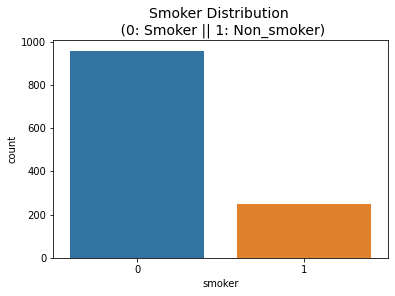

In [68]:
Non_smoker= len(ytest[ytest==1])
Smoker=len(ytest[ytest==0])

percentofNon_smokers= Non_smoker/(Non_smoker+Smoker)
percentofSmokers= Smoker/(Non_smoker+Smoker)

print("Percentage of Non_smokers is", percentofNon_smokers*100)
print("Percentage of Smokers is", percentofSmokers*100)

plt.title('Smoker Distribution \n (0: Smoker || 1: Non_smoker)', fontsize=14)
sns.countplot(ytrain,data=insurancedf)

Both sets of training and test data have similar/same unbalanced ratio. Therefore, SKF has worked. Step has been completed.

##Scaling and Feature Selection

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


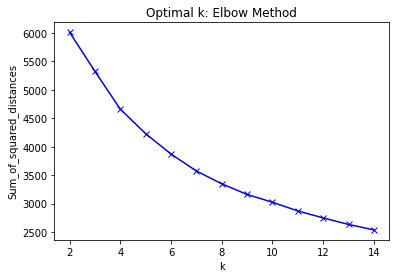

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


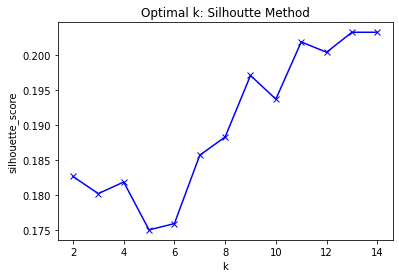

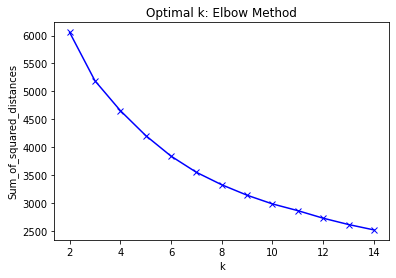

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


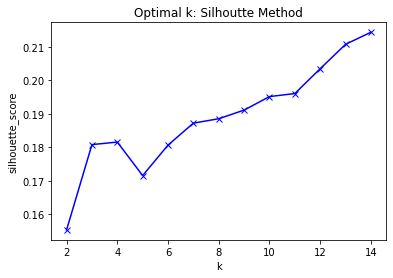

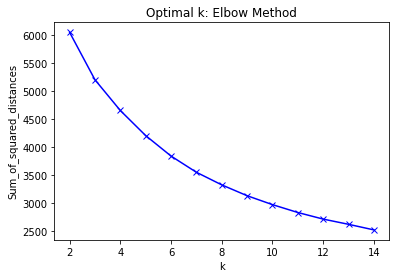

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


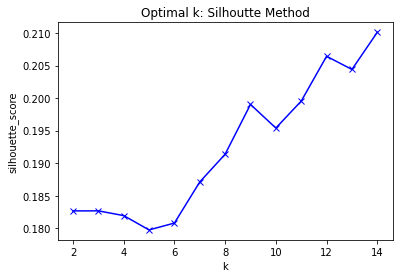

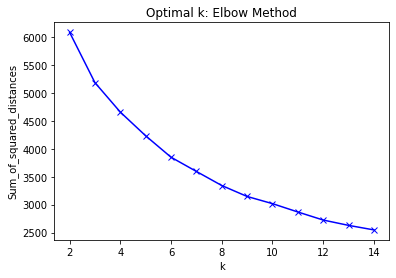

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


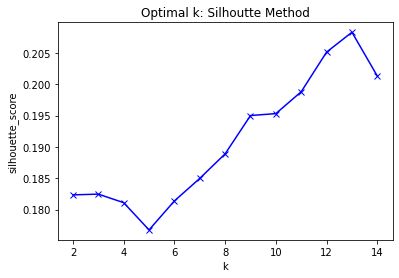

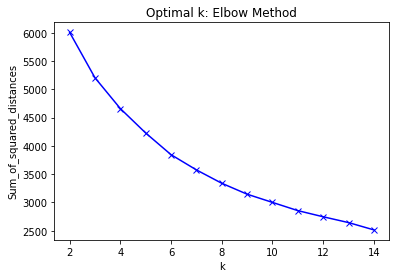

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


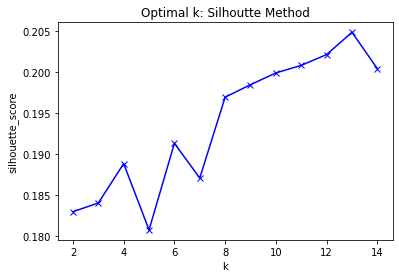

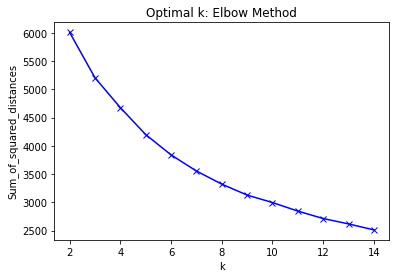

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


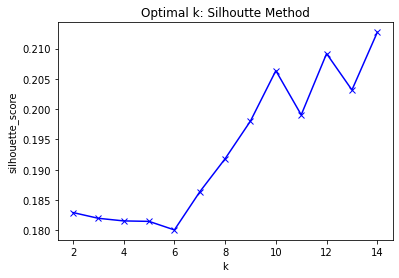

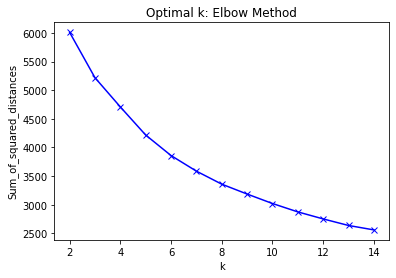

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


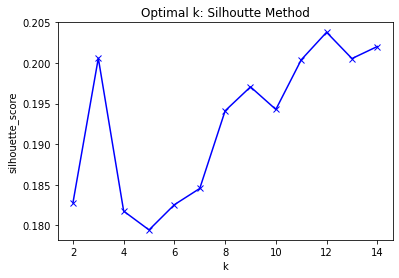

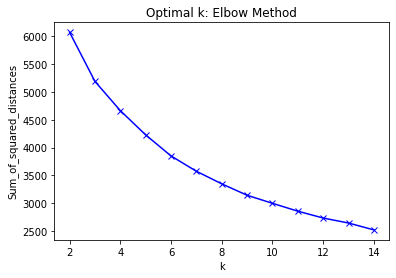

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


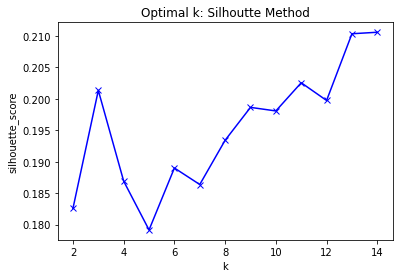

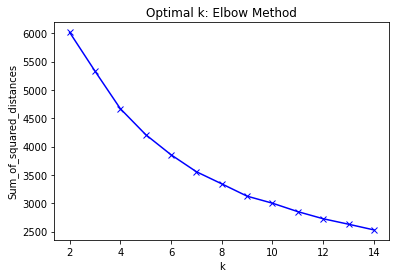

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


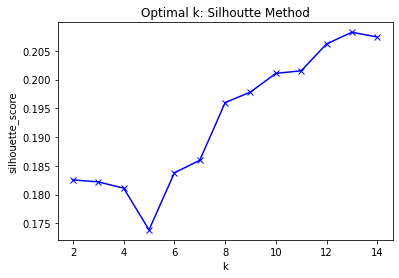

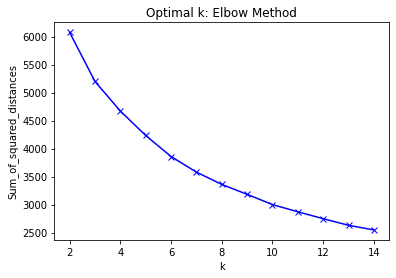

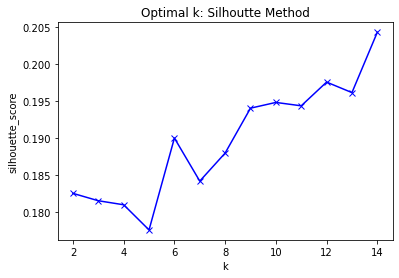

In [72]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

#enumerate the splits and summerise the distributions
for train_index, test_index in skf.split(x, y):
  
  #selects rows
  xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
  ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
  
  std_scaled=StandardScaler().fit(xtrain)
  xtrain_norm=std_scaled.transform(xtrain)
  xtest_norm=std_scaled.transform(xtest)
  
  xtrain.loc[xtrain.index,xtrain.columns] = xtrain_norm
  xtest.loc[xtest.index,xtest.columns] = xtest_norm

  select=sklearn.feature_selection.SelectKBest(k=4)
  selected_features=select.fit(xtrain,ytrain)
  indices_selected=selected_features.get_support(indices=True)

  colnames_selected=[x.columns[i] for i in indices_selected]
  xtrain_selected=xtrain[colnames_selected]
  xtest_selected=xtest[colnames_selected]


  Sum_of_squared_distances = []
  K = range(2,15)
  for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(xtrain)
    Sum_of_squared_distances.append(km.inertia_)
  plt.figure(1)
  plt.plot(K, Sum_of_squared_distances, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Sum_of_squared_distances')
  plt.title('Optimal k: Elbow Method')
  plt.show()

  sil=[]
  #k_sil= range(1,15)

  for k_s in K:
    #print(k_sil,end=' ')
    kmeans= KMeans(n_clusters=k_s)
    kmeans=kmeans.fit(xtrain)
    labels=kmeans.labels_
    sil.append(silhouette_score(xtrain,labels,metric='euclidean')) 
  plt.figure(2)
  plt.plot(K,sil, 'bx-')
  plt.xlabel('k')
  plt.ylabel('silhouette_score')
  plt.title('Optimal k: Silhoutte Method')
  plt.show


<function matplotlib.pyplot.show>

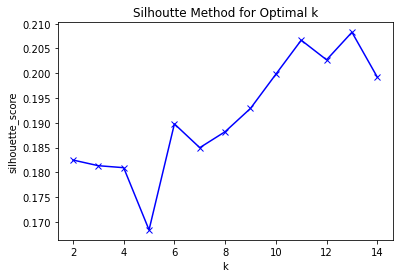

In [71]:
plt.plot(K,sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Optimal k: Silhoutte Method')
plt.show